In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
hr=pd.read_csv(r'E:\Data science Projects\HR Analytics\train_hr.csv')
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


# Training data

<h3>Exploratory Data Analysis</h3>


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [4]:
hr.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [5]:
hr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enrollee_id,18359.0,16729.360096,9643.749725,1.000,8378.500,16706.00,25148.50,33380.000
city_development_index,18359.0,0.847140,0.110189,0.448,0.796,0.91,0.92,0.949
training_hours,18359.0,65.899014,60.885300,1.000,23.000,47.00,89.00,336.000
target,18359.0,0.132088,0.338595,0.000,0.000,0.00,0.00,1.000


In [6]:
hr.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [8]:
hr.shape

(18359, 14)

In [9]:
hr['gender']=hr['gender'].fillna('Male')

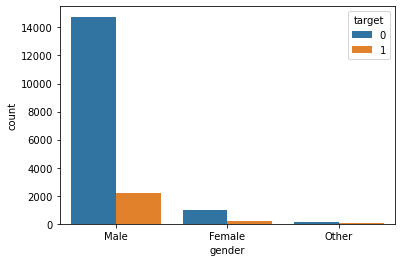

In [10]:
sns.countplot(hr['gender'],hue=hr['target'])

In [11]:
hr['enrolled_university'].value_counts()

no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

In [12]:
hr['enrolled_university']=hr['enrolled_university'].fillna('no_enrollment')

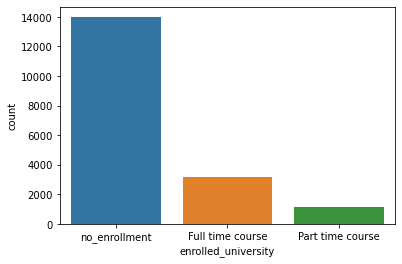

In [13]:
sns.countplot(x='enrolled_university',data=hr)

In [14]:
dup=hr['target'].apply(lambda x : 'Not looking for a job' if x == 0 else 'Looking for a job')


In [15]:
dup=dup.value_counts().reset_index()
dup

,index,target
0,Not looking for a job,15934
1,Looking for a job,2425


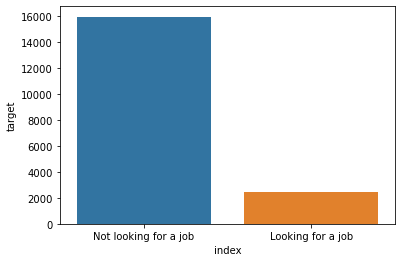

In [16]:
sns.barplot(x='index',y='target',data=dup)

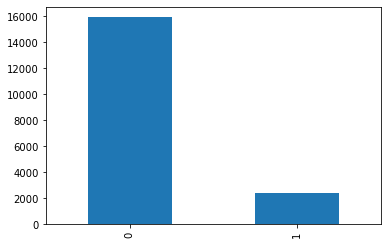

In [17]:
hr['target'].value_counts().plot.bar()

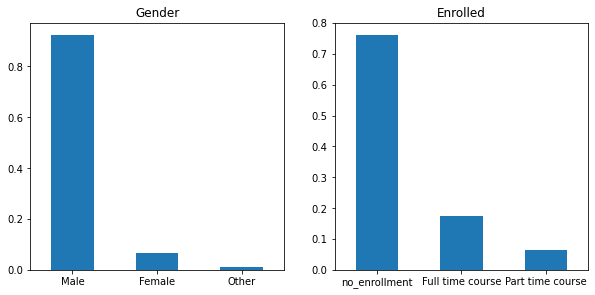

In [18]:
plt.figure(1), plt.subplot(221),hr['gender'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Gender',rot=0),
plt.subplot(222),hr['enrolled_university'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Enrolled',rot=0),
plt.show()

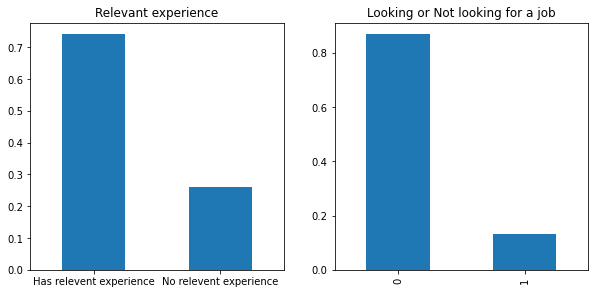

In [19]:
plt.figure(2), 
plt.subplot(223),hr['relevent_experience'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Relevant experience',rot=0),
plt.subplot(224),hr['target'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Looking or Not looking for a job'),
plt.show()

In [20]:
hr.isnull().sum().sort_values(ascending=False)

company_type              5039
company_size              4779
major_discipline          2838
education_level            457
last_new_job               367
experience                  59
target                       0
training_hours               0
enrolled_university          0
relevent_experience          0
gender                       0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

In [21]:
gd=pd.crosstab(hr['gender'],hr['target'])
gd

target,0,1
gender,,
Female,1009,179
Male,14765,2217
Other,160,29


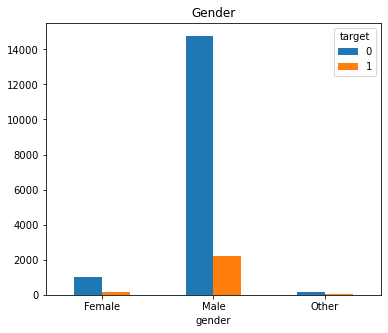

In [22]:
gd.plot.bar(figsize=(6,5),rot=0,title='Gender')
plt.show()

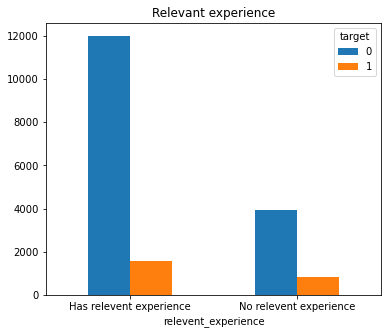

In [23]:
re=pd.crosstab(hr['relevent_experience'],hr['target'])
re.plot.bar(figsize=(6,5),rot=0,title='Relevant experience')
plt.show()

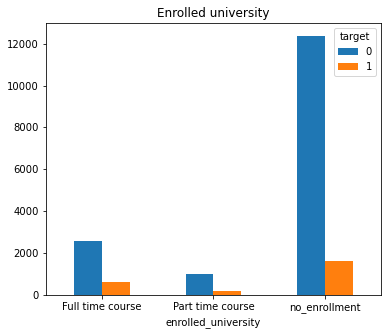

In [24]:
eu=pd.crosstab(hr['enrolled_university'],hr['target'])
eu.plot.bar(figsize=(6,5),rot=0,title='Enrolled university')
plt.show()

In [25]:
hr.isnull().sum().sort_values(ascending=False)

company_type              5039
company_size              4779
major_discipline          2838
education_level            457
last_new_job               367
experience                  59
target                       0
training_hours               0
enrolled_university          0
relevent_experience          0
gender                       0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

In [26]:
hr['education_level']=hr['education_level'].fillna('Graduate')

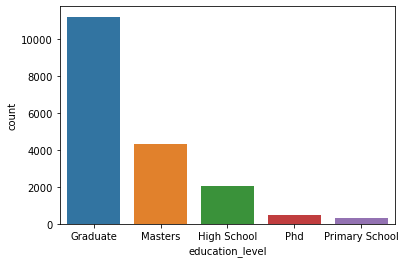

In [27]:
sns.countplot(x='education_level',data=hr)

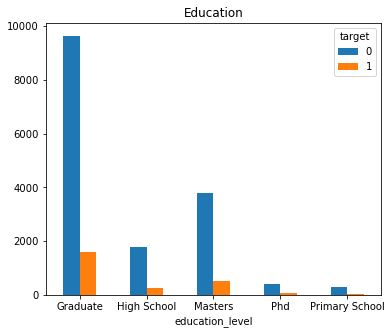

In [28]:
el=pd.crosstab(hr['education_level'],hr['target'])
el.plot.bar(figsize=(6,5),rot=0,title='Education')
plt.show()

In [29]:
hr['major_discipline']=hr['major_discipline'].fillna('STEM')

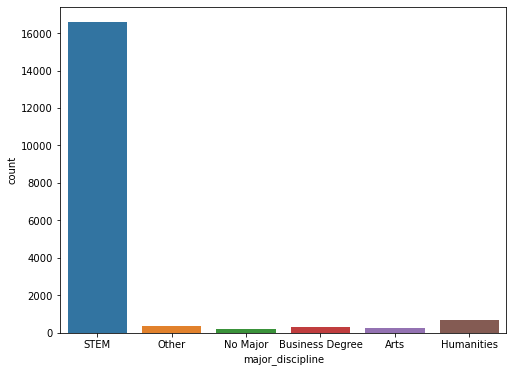

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='major_discipline',data=hr)

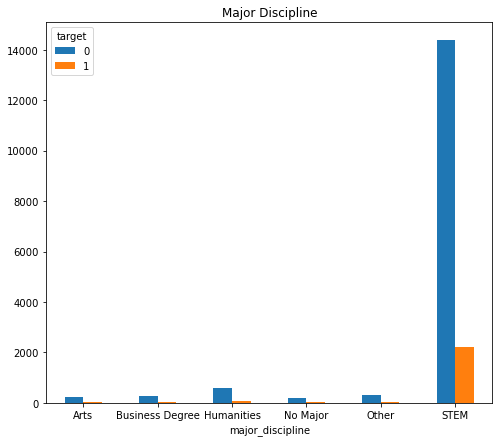

In [31]:
md=pd.crosstab(hr['major_discipline'],hr['target'])
md.plot.bar(figsize=(8,7),rot=0,title='Major Discipline')
plt.show()

In [32]:
hr['experience']=hr['experience'].replace('>20',21)
hr['experience']=hr['experience'].replace('<1',0)

In [33]:
hr['experience']=hr['experience'].fillna('21')
hr['experience']=hr['experience'].astype(int)

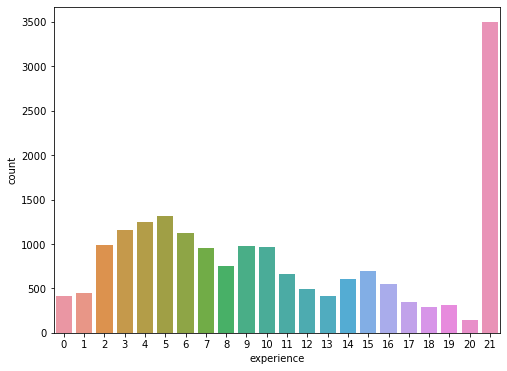

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='experience',data=hr)

In [35]:
exp_mode = hr.groupby(['target','experience'])
exp_mode.size()

target  experience
0       0              315
        1              344
        2              821
        3              968
        4             1039
        5             1125
        6              972
        7              811
        8              669
        9              861
        10             847
        11             584
        12             445
        13             364
        14             527
        15             618
        16             492
        17             313
        18             260
        19             275
        20             130
        21            3154
1       0              101
        1              108
        2              171
        3              191
        4              211
        5              184
        6              153
        7              139
        8               86
        9              118
        10             120
        11              83
        12              52
        13              48
        1

In [36]:
hr['company_type']=hr['company_type'].fillna('Pvt Ltd')


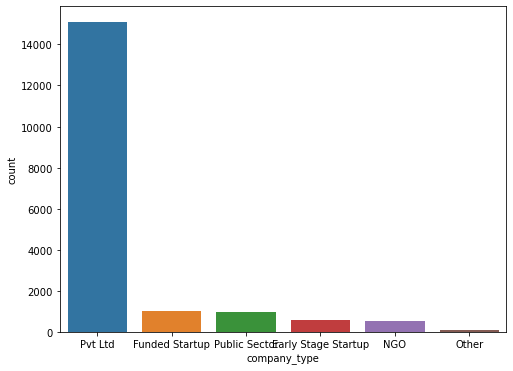

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='company_type',data=hr)

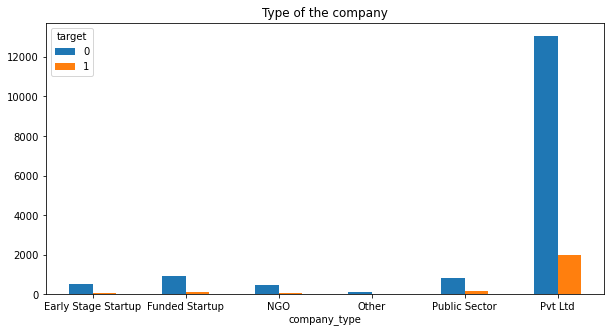

In [38]:
ct=pd.crosstab(hr['company_type'],hr['target'])
ct.plot.bar(figsize=(10,5),rot=0,title='Type of the company')
plt.show()

In [39]:
hr['company_size']=hr['company_size'].fillna('50-99')
hr['company_size'].replace({'<10':'10','10/49':'30','50-99':'75','100-500':'300','500-999':'750',
                            '1000-4999':'3000','5000-9999':'7500','10000+':'10000'},inplace=True)

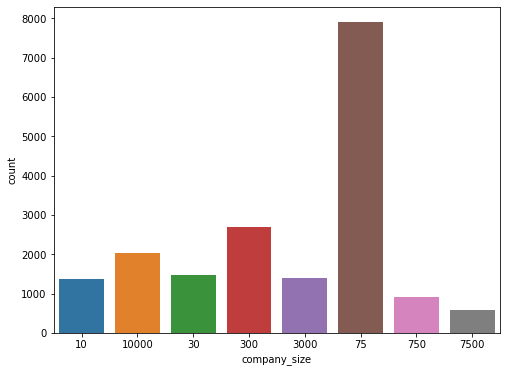

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='company_size',data=hr)

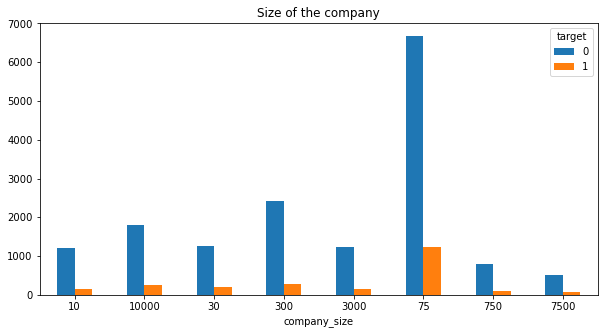

In [41]:
cs=pd.crosstab(hr['company_size'],hr['target'])
cs.plot.bar(figsize=(10,5),rot=0,title='Size of the company')
plt.show()

In [42]:
hr['last_new_job']=hr['last_new_job'].fillna(1)

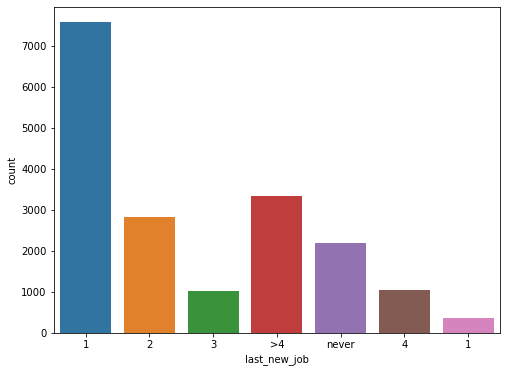

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x='last_new_job',data=hr)

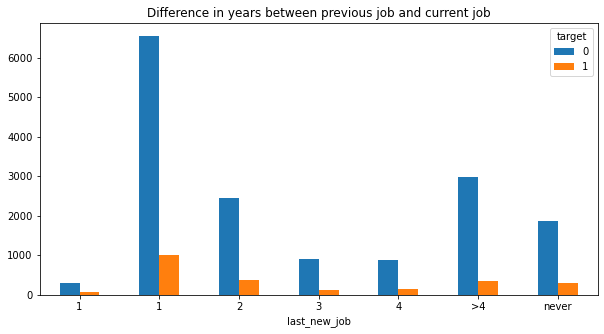

In [44]:
lj=pd.crosstab(hr['last_new_job'],hr['target'])
lj.plot.bar(figsize=(10,5),rot=0,title='Difference in years between previous job and current job')
plt.show()

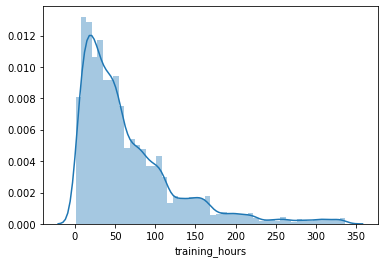

In [45]:
sns.distplot(hr['training_hours'])

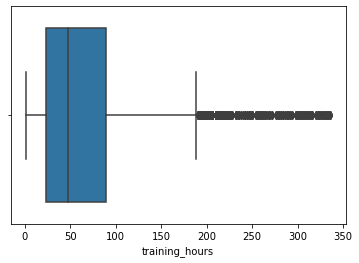

In [46]:
sns.boxplot(hr['training_hours'])

In [47]:
hr.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,18359,NaN,NaN,NaN,16729.4,9643.75,1,8378.5,16706,25148.5,33380
city,18359,123,city_103,4358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,18359,NaN,NaN,NaN,0.84714,0.110189,0.448,0.796,0.91,0.92,0.949
gender,18359,3,Male,16982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,18359,2,Has relevent experience,13596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18359,3,no_enrollment,14001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,18359,5,Graduate,11226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,18359,6,STEM,16576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,18359,NaN,NaN,NaN,10.6165,6.80768,0,5,9,16,21
company_size,18359,8,75,7899,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:

le=LabelEncoder()

In [49]:
hr['enrolled_university']=le.fit_transform(hr['enrolled_university'])


In [50]:
hr['education_level']=le.fit_transform(hr['education_level'])


In [51]:
hr['major_discipline']=le.fit_transform(hr['major_discipline'])


In [52]:
hr['experience']=le.fit_transform(hr['experience'])
hr['experience'].value_counts()

21    3496
5     1309
4     1250
3     1159
6     1125
2      992
9      979
10     967
7      950
8      755
15     695
11     667
14     602
16     549
12     497
1      452
0      416
13     412
17     347
19     308
18     286
20     146
Name: experience, dtype: int64

In [53]:
hr['gender']=hr['gender'].map({'Male':1,'Female':0,'Other':2})
hr['gender']=hr['gender'].fillna(1).astype('int')

In [54]:
hr['company_type']=le.fit_transform(hr['company_type'])
hr['company_type'].value_counts()

5    15090
1     1038
4      996
0      582
2      534
3      119
Name: company_type, dtype: int64

In [55]:
hr['last_new_job'].replace({'>4':5,'never':0},inplace=True)

In [56]:
hr['last_new_job']=hr['last_new_job'].astype('int')

In [57]:
hr['relevent_experience']=le.fit_transform(hr['relevent_experience'])
hr['relevent_experience'].value_counts()

0    13596
1     4763
Name: relevent_experience, dtype: int64

In [58]:
hr['company_size']=hr['company_size'].astype('int')


In [59]:
hr.drop(['city','enrollee_id'],axis=1,inplace=True)


In [60]:
hr.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.689,1,0,2,0,5,3,300,5,1,106,0
1,0.923,1,0,2,0,5,14,10,1,1,69,0
2,0.910,1,0,2,0,5,6,75,4,2,4,0
3,0.666,1,0,2,0,5,14,75,5,1,26,0
4,0.887,1,1,2,2,5,8,75,5,2,88,1


In [61]:
X=hr.drop(['target'],axis=1)

In [62]:
X.shape

(18359, 11)

In [63]:
y=hr['target']
y.shape

(18359,)

In [64]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
X=X_smote
y=y_smote

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


In [66]:

lrmodel = LogisticRegression(max_iter=5000)
lrmodel.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [67]:
lpredictions = lrmodel.predict(X_test)

In [68]:
print("Confusion Matrix")
print(confusion_matrix(y_test,lpredictions))

print("Classification report")

print(classification_report(y_test, lpredictions)) 


Confusion Matrix
[[2961 1801]
 [1862 2937]]
Classification report
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      4762
           1       0.62      0.61      0.62      4799

    accuracy                           0.62      9561
   macro avg       0.62      0.62      0.62      9561
weighted avg       0.62      0.62      0.62      9561



In [69]:
lscore = round((lrmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",lscore,"%")


Model Score: 61.69 %


In [70]:
kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
kpredictions = kmodel.predict(X_test)

In [72]:
print("Confusion Matrix")
print(confusion_matrix(y_test,kpredictions))

print("Classification report")

print(classification_report(y_test, kpredictions)) 

kscore = round((kmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",kscore,"%")

Confusion Matrix
[[3294 1468]
 [ 375 4424]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      4762
           1       0.75      0.92      0.83      4799

    accuracy                           0.81      9561
   macro avg       0.82      0.81      0.80      9561
weighted avg       0.82      0.81      0.80      9561


Model Score: 80.72 %


In [73]:
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
dprediction = dmodel.predict(X_test)

In [75]:
print("Confusion Matrix")
print(confusion_matrix(y_test,dprediction))

dscore = round((dmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",dscore,"%")

Confusion Matrix
[[3748 1014]
 [ 887 3912]]

Model Score: 80.12 %


In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rmodel = RandomForestClassifier(n_estimators=100)
rmodel.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
rprediction = rmodel.predict(X_test)

In [79]:
print("Confusion Matrix")
print(confusion_matrix(y_test,rprediction))

rscore = round((rmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",rscore,"%")

Confusion Matrix
[[3954  808]
 [ 714 4085]]

Model Score: 84.08 %


In [80]:
smodel = SVC()
smodel.fit(X_train,y_train)

SVC()

In [81]:
sprediction = smodel.predict(X_test)

In [82]:
#Accuracy Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,sprediction))

sscore = round((smodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",sscore,"%")

Confusion Matrix
[[1282 3480]
 [1129 3670]]

Model Score: 51.79 %


In [83]:
data = [['Logistic Regression',lscore],['K-Nearest Neighbour',kscore],
        ['Decision Tree',dscore],['Random Forest',rscore],['Support Vector Machine',sscore]]
final = pd.DataFrame(data,columns=['Algorithm','Score'],index=[1,2,3,4,5])

In [166]:
print("The results of Data Modeling are as follows:\n ")
print(final.sort_values(by='Score',ascending=False))

The results of Data Modeling are as follows:
 
                Algorithm  Score
4           Random Forest  84.08
2     K-Nearest Neighbour  80.72
3           Decision Tree  80.12
1     Logistic Regression  61.69
5  Support Vector Machine  51.79


# Testing data

In [85]:
hrtest=pd.read_csv(r'E:\Data science Projects\HR Analytics\test_hr.csv')
hrtest.head()
hrtestfinal=hrtest.copy()

In [86]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15021 non-null  int64  
 1   city                    15021 non-null  object 
 2   city_development_index  15021 non-null  float64
 3   gender                  11633 non-null  object 
 4   relevent_experience     15021 non-null  object 
 5   enrolled_university     14742 non-null  object 
 6   education_level         14626 non-null  object 
 7   major_discipline        12628 non-null  object 
 8   experience              14977 non-null  object 
 9   company_size            10970 non-null  object 
 10  company_type            10691 non-null  object 
 11  last_new_job            14717 non-null  object 
 12  training_hours          15021 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [87]:
hrtest.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [88]:
hrtest.shape

(15021, 13)

In [89]:
hrtest.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,15021,NaN,NaN,NaN,16643,9626.9,6,8316,16664,24908,33378
city,15021,123,city_103,3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,15021,NaN,NaN,NaN,0.846683,0.109709,0.448,0.794,0.91,0.92,0.949
gender,11633,3,Male,10578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,15021,2,Has relevent experience,11102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,14742,3,no_enrollment,11228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,14626,5,Graduate,8743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,12628,6,STEM,11117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,14977,22,>20,2713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,10970,8,50-99,2577,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
hrtest.isnull().sum().sort_values(ascending=False)

company_type              4330
company_size              4051
gender                    3388
major_discipline          2393
education_level            395
last_new_job               304
enrolled_university        279
experience                  44
training_hours               0
relevent_experience          0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

In [91]:
hrtest['company_type']=hrtest['company_type'].fillna('Pvt Ltd')

In [92]:
hrtest['company_type']=le.fit_transform(hrtest['company_type'])


In [93]:
hrtest.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type                int32
last_new_job               object
training_hours              int64
dtype: object

In [94]:
hrtest['company_type'].value_counts()

5    12393
1      842
4      796
0      447
2      439
3      104
Name: company_type, dtype: int64

In [95]:
hrtest['company_size'].value_counts()

50-99        2577
100-500      2147
10000+       1622
10/49        1198
1000-4999    1114
<10          1104
500-999       737
5000-9999     471
Name: company_size, dtype: int64

In [96]:
hrtest['company_size'].replace({'<10':'10','10/49':'30','50-99':'75','100-500':'300','500-999':'750',
                            '1000-4999':'3000','5000-9999':'7500','10000+':'10000'},inplace=True)


In [97]:
hrtest['company_size']=hrtest['company_size'].fillna(75)
hrtest['company_size']=hrtest['company_size'].astype('int')

In [98]:
hrtest.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size                int32
company_type                int32
last_new_job               object
training_hours              int64
dtype: object

In [99]:
hrtest.isnull().sum().sort_values(ascending=False)

gender                    3388
major_discipline          2393
education_level            395
last_new_job               304
enrolled_university        279
experience                  44
training_hours               0
company_type                 0
company_size                 0
relevent_experience          0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

In [100]:
hrtest['gender'].value_counts()

Male      10578
Female      897
Other       158
Name: gender, dtype: int64

In [101]:
hrtest['gender']=hr['gender'].fillna('Male')

In [102]:
hrtest['gender']=hrtest['gender'].map({'Male':1,'Female':0,'Other':2})
hrtest['gender']=hrtest['gender'].fillna(1).astype('int')

In [103]:
hrtest.isnull().sum().sort_values(ascending=False)

major_discipline          2393
education_level            395
last_new_job               304
enrolled_university        279
experience                  44
training_hours               0
company_type                 0
company_size                 0
relevent_experience          0
gender                       0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

In [104]:
hrtest.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                      int32
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size                int32
company_type                int32
last_new_job               object
training_hours              int64
dtype: object

In [107]:
hrtest['major_discipline']=hrtest['major_discipline'].fillna('STEM')

In [108]:
hrtest['major_discipline']=le.fit_transform(hrtest['major_discipline'])


In [109]:
hrtest['education_level']=hrtest['education_level'].fillna('Graduate')

In [111]:
hrtest['education_level']=le.fit_transform(hrtest['education_level'])


In [112]:
hrtest['last_new_job'].replace({'>4':5,'never':0},inplace=True)
hrtest['last_new_job']=hrtest['last_new_job'].fillna(1)
hrtest['last_new_job']=hrtest['last_new_job'].astype('int')


In [113]:
hrtest['enrolled_university']=hrtest['enrolled_university'].fillna('no_enrollment')

In [114]:
hrtest['enrolled_university']=le.fit_transform(hrtest['enrolled_university'])


In [115]:
hrtest['experience']=hrtest['experience'].replace('>20',21)
hrtest['experience']=hrtest['experience'].replace('<1',0)

In [116]:
hrtest['experience']=hrtest['experience'].fillna('21')
hrtest['experience']=hrtest['experience'].astype(int)

In [117]:
hrtest['relevent_experience']=le.fit_transform(hrtest['relevent_experience'])


In [118]:
hrtest.drop(['city','enrollee_id'],axis=1,inplace=True)


In [119]:
hrtest.head(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.448,1,1,0,0,5,0,3000,4,1,15
1,0.939,1,1,2,0,5,21,75,5,1,94
2,0.920,1,1,0,0,5,3,75,5,1,17
3,0.924,1,1,2,3,5,21,75,5,2,76
4,0.830,1,0,2,0,5,6,10,5,2,65
5,0.920,1,0,2,0,5,7,300,5,2,33
6,0.624,1,0,2,0,5,3,10000,5,1,48
7,0.926,1,0,0,0,5,9,10,5,2,84
8,0.920,1,0,2,0,5,18,300,5,5,85
9,0.920,1,1,2,1,5,2,75,5,0,99


# Logistic regression

In [120]:
lrtestmodel = LogisticRegression(max_iter=5000)
lrtestmodel.fit(X,y)

LogisticRegression(max_iter=5000)

In [129]:
X.shape,y.shape

((31868, 11), (31868,))

In [130]:
hrtest.shape

(15021, 11)

In [131]:
X_sampletest=hrtest

In [132]:
X_sampletest.shape

(15021, 11)

In [133]:
test_prediction=lrtestmodel.predict(X_sampletest)


In [134]:
logscore = round((lrtestmodel.score(X, y)*100),2)
print ("\nAccuracy:",logscore,"%")


Accuracy: 61.66 %


Logfinal=pd.concat([hrtestfinal['enrollee_id'],pd.DataFrame(test_prediction,columns=['target'])],1)
Logfinal.to_csv("E:\Data science Projects\HR Analytics\logfinal.csv",index=False)

# Ada boost Classification

In [136]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()

adb.fit(X,y)

AdaBoostClassifier()

In [137]:
testadb_prediction=adb.predict(X_sampletest)


In [138]:
adbscore = round((adb.score(X, y)*100),2)
print ("\nAccuracy:",adbscore,"%")



Accuracy: 73.69 %


adbfinal=pd.concat([hrtestfinal['enrollee_id'],pd.DataFrame(testadb_prediction,columns=['target'])],1)
adbfinal.to_csv(r"E:\Data science Projects\HR Analytics\adbfinal.csv",index=False)

# Kneighbours classification

In [140]:
kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [141]:
testknn_prediction=kmodel.predict(X_sampletest)


In [142]:
knnscore = round((kmodel.score(X, y)*100),2)
print ("\nAccuracy:",knnscore,"%")


Accuracy: 90.85 %


knnfinal=pd.concat([hrtestfinal['enrollee_id'],pd.DataFrame(testadb_prediction,columns=['target'])],1)
knnfinal.to_csv(r"E:\Data science Projects\HR Analytics\knnfinal.csv",index=False)

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC

# Support vector machine

In [145]:
svmodel=SVC()
svmodel.fit(X,y)

SVC()

In [146]:
testsv_prediction=svmodel.predict(X_sampletest)
svscore = round((svmodel.score(X, y)*100),2)
print ("\nAccuracy:",svscore,"%")


Accuracy: 51.83 %


svfinal=pd.concat([hrtestfinal['enrollee_id'],pd.DataFrame(testsv_prediction,columns=['target'])],1)
svfinal.to_csv(r"E:\Data science Projects\HR Analytics\svfinal.csv",index=False)

# Stochastic Gradient Descent


In [149]:
sgdmodel = SGDClassifier()
sgdmodel.fit(X,y)
sgd_pred = sgdmodel.predict(X_sampletest)


In [150]:
sgdscore = round((sgdmodel.score(X, y)*100),2)
print ("\nAccuracy:",sgdscore,"%")


Accuracy: 59.97 %


sgdfinal=pd.concat([hrtestfinal['enrollee_id'],pd.DataFrame(sgd_pred,columns=['target'])],1)
sgdfinal.to_csv(r"E:\Data science Projects\HR Analytics\sgdfinal.csv",index=False)

# Random forest classifcation

In [152]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X,y)
random_prediction = random_forest.predict(X_sampletest)


In [153]:
randomforestscore = round((random_forest.score(X, y)*100),2)
print ("\nAccuracy:",randomforestscore,"%")


Accuracy: 99.85 %


In [154]:
randomforestfinal=pd.concat([hrtestfinal['enrollee_id'],pd.DataFrame(random_prediction,columns=['target'])],1)
randomforestfinal.to_csv(r"E:\Data science Projects\HR Analytics\randomforestfinal.csv",index=False)

# Gaussian Naive Bayes


In [155]:
gaussianmodel = GaussianNB()
gaussianmodel.fit(X,y)
guassian_prediction = gaussianmodel.predict(X_sampletest)


In [156]:
gaussianscore = round((gaussianmodel.score(X, y)*100),2)
print ("\nAccuracy:",gaussianscore,"%")


Accuracy: 62.1 %


gaussianfinal=pd.concat([hrtestfinal['enrollee_id'],pd.DataFrame(guassian_prediction,columns=['target'])],1)
gaussianfinal.to_csv(r"E:\Data science Projects\HR Analytics\gaussianfinal.csv",index=False)

In [159]:
data = [['Logistic Regression',logscore],['Ada Boost Classification',adbscore],['Kneighbours Classification',knnscore],['Support Vector Machine',svscore],
        ['Stochastic Gradient Descent',sgdscore],['Random Forest',randomforestscore],['Gaussian Naive Bayes',gaussianscore]]
finalclassification = pd.DataFrame(data,columns=['Algorithm','Score'],index=[1,2,3,4,5,6,7])

In [164]:
print("The results of Data Modeling are as follows:\n ")
print(finalclassification.sort_values(by='Score',ascending=False))

The results of Data Modeling are as follows:
 
                     Algorithm  Score
6                Random Forest  99.85
3   Kneighbours Classification  90.85
2     Ada Boost Classification  73.69
7         Gaussian Naive Bayes  62.10
1          Logistic Regression  61.66
5  Stochastic Gradient Descent  59.97
4       Support Vector Machine  51.83
